# CASE STUDY 2_DECISION TREES_pd5306

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

In [2]:
#import this os to execute the plotDecisionTree without an error saying 'Graphviz executables not found'
import os 
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

In [3]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [4]:
# Create data frame for Flight delays data set. 
flight_df = pd.read_csv('FlightDelays.csv')

# Show the Riding Mower data frame.
print(flight_df)

      SCH_TIME CARRIER  DEP_TIME DEST  DISTANCE  FL_NUM ORIGIN  WEATHER  \
0         1455      OH      1455  JFK       184    5935    BWI        0   
1         1640      DH      1640  JFK       213    6155    DCA        0   
2         1245      DH      1245  LGA       229    7208    IAD        0   
3         1715      DH      1709  LGA       229    7215    IAD        0   
4         1039      DH      1035  LGA       229    7792    IAD        0   
...        ...     ...       ...  ...       ...     ...    ...      ...   
2196       645      RU       644  EWR       199    2761    DCA        0   
2197      1700      RU      1653  EWR       213    2497    IAD        0   
2198      1600      RU      1558  EWR       199    2361    DCA        0   
2199      1359      RU      1403  EWR       199    2216    DCA        0   
2200      1730      RU      1736  EWR       199    2097    DCA        0   

      WK_DAY  MTH_DAY FL_STATUS  
0          4        1    ontime  
1          4        1    ontime

In [5]:
print("Number of rows in the dataframe: ", flight_df.shape[0])
print("Number of columns in the dataframe: ", flight_df.shape[1])
print("Shape of the dataframe (rows , columns):", flight_df.shape)

Number of rows in the dataframe:  2201
Number of columns in the dataframe:  11
Shape of the dataframe (rows , columns): (2201, 11)


In [6]:
flight_df = flight_df.drop(columns = ['DEST', 'ORIGIN'])#Drop irrelevant columns 
flight_df

,SCH_TIME,CARRIER,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS
0,1455,OH,1455,184,5935,0,4,1,ontime
1,1640,DH,1640,213,6155,0,4,1,ontime
2,1245,DH,1245,229,7208,0,4,1,ontime
3,1715,DH,1709,229,7215,0,4,1,ontime
4,1039,DH,1035,229,7792,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,199,2761,0,6,31,ontime
2197,1700,RU,1653,213,2497,0,6,31,ontime
2198,1600,RU,1558,199,2361,0,6,31,ontime
2199,1359,RU,1403,199,2216,0,6,31,ontime


In [7]:
print("Columns data types in flight_df data frame:")
flight_df.dtypes

Columns data types in flight_df data frame:


SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object

In [8]:
# flight_df.FL_STATUS = flight_df.FL_STATUS.astype("category") 
# print(flight_df.FL_STATUS.cat.categories)
# print(flight_df.FL_STATUS.dtype)

In [9]:
flight_df.CARRIER = flight_df.CARRIER.astype("category") 
print(flight_df.CARRIER.cat.categories)
print(flight_df.CARRIER.dtype)

Index(['CO', 'DH', 'DL', 'MQ', 'OH', 'RU', 'UA', 'US'], dtype='object')
category


In [10]:
predictor_var_df = pd.get_dummies(flight_df.drop(columns = ["FL_STATUS"]), prefix_sep='_', drop_first = True)
print(f"List of {len(predictor_var_df.columns)} predictor variables:")
predictor_var_df.columns

List of 14 predictor variables:


Index(['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
       'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US'],
      dtype='object')

In [11]:
flight_df = pd.concat([predictor_var_df.iloc[:], flight_df['FL_STATUS']], axis = 1)
print(f"Modified list of {len(flight_df.columns)} column variables:")
flight_df.columns

Modified list of 15 column variables:


Index(['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_OH',
       'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'FL_STATUS'],
      dtype='object')

In [12]:
print("Modified data types of columns in data frame:")
flight_df.dtypes

Modified data types of columns in data frame:


SCH_TIME       int64
DEP_TIME       int64
DISTANCE       int64
FL_NUM         int64
WEATHER        int64
WK_DAY         int64
MTH_DAY        int64
CARRIER_DH     uint8
CARRIER_DL     uint8
CARRIER_MQ     uint8
CARRIER_OH     uint8
CARRIER_RU     uint8
CARRIER_UA     uint8
CARRIER_US     uint8
FL_STATUS     object
dtype: object

In [13]:
flight_df.count() #no missing values 

SCH_TIME      2201
DEP_TIME      2201
DISTANCE      2201
FL_NUM        2201
WEATHER       2201
WK_DAY        2201
MTH_DAY       2201
CARRIER_DH    2201
CARRIER_DL    2201
CARRIER_MQ    2201
CARRIER_OH    2201
CARRIER_RU    2201
CARRIER_UA    2201
CARRIER_US    2201
FL_STATUS     2201
dtype: int64

In [14]:
print("Modified data frame:")
flight_df.head(10)

Modified data frame:


,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US,FL_STATUS
0,1455,1455,184,5935,0,4,1,0,0,0,1,0,0,0,ontime
1,1640,1640,213,6155,0,4,1,1,0,0,0,0,0,0,ontime
2,1245,1245,229,7208,0,4,1,1,0,0,0,0,0,0,ontime
3,1715,1709,229,7215,0,4,1,1,0,0,0,0,0,0,ontime
4,1039,1035,229,7792,0,4,1,1,0,0,0,0,0,0,ontime
5,840,839,228,7800,0,4,1,1,0,0,0,0,0,0,ontime
6,1240,1243,228,7806,0,4,1,1,0,0,0,0,0,0,ontime
7,1645,1644,228,7810,0,4,1,1,0,0,0,0,0,0,ontime
8,1715,1710,228,7812,0,4,1,1,0,0,0,0,0,0,ontime
9,2120,2129,228,7814,0,4,1,1,0,0,0,0,0,0,ontime


In [15]:
# Apply DecisionTreeClassifier() function to create classification tree.
# Use max_depth to control tree size: 
        # for the first split: max_depth=1;
        # for the two splits:  max_depth=2;
        # for full tree: max_depth=None (don't use it). 
# Parameter random_state controls randomness of the estimator,
# for random_state=0, the integer value of 0 is a seed value
# to control random choices in the function.

# Create classification tree for the first split (max_depth=1)
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)

# Fit Flight data frame (other than predictor variables) into the tree. 
# Column 'FL_STATUS' as outcome is not used for the fitting algorithm. 
classTree.fit(flight_df.drop(columns=['FL_STATUS']), flight_df['FL_STATUS'])

# Display classes used in the classification tree: 'Nonowner' and 'Owner'. 
print("Classes: {}".format(', '.join(classTree.classes_)))

Classes: delayed, ontime


Classification Tree after First Split


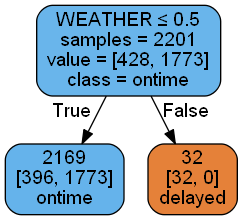

In [16]:
# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print('Classification Tree after First Split')
plotDecisionTree(classTree, feature_names=flight_df.columns[:14], class_names=classTree.classes_)

Classes: delayed, ontime

Classification Tree after Second Split


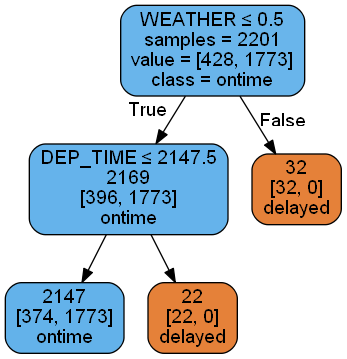

In [17]:
# Create classification tree for the second split (max_depth=2).
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)

# Fit Riding Mower data frame (Income and Lot_Size) into the tree. 
# Column 'FL_STATUS' as outcome is not used for the fitting algorithm. 
classTree.fit(flight_df.drop(columns=['FL_STATUS']), flight_df['FL_STATUS'])

# Display classes used in the classification tree: 'Nonowner' and 'Owner'.
print("Classes: {}".format(', '.join(classTree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print()
print('Classification Tree after Second Split')
plotDecisionTree(classTree, feature_names=flight_df.columns[:14], class_names=classTree.classes_)

# Develop a classification tree for filght delays case

In [18]:
# Develop predictors X and output variable Y for the data set.
X = flight_df.drop(columns=['FL_STATUS'])
y = flight_df['FL_STATUS']

# Develop training (60%) and validation(40% or 0.4) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [19]:
print("Number of records of training and valid/testing data are: ", len(train_X), "and", len(valid_X))

Number of records of training and valid/testing data are:  1320 and 881


## Full classification tree

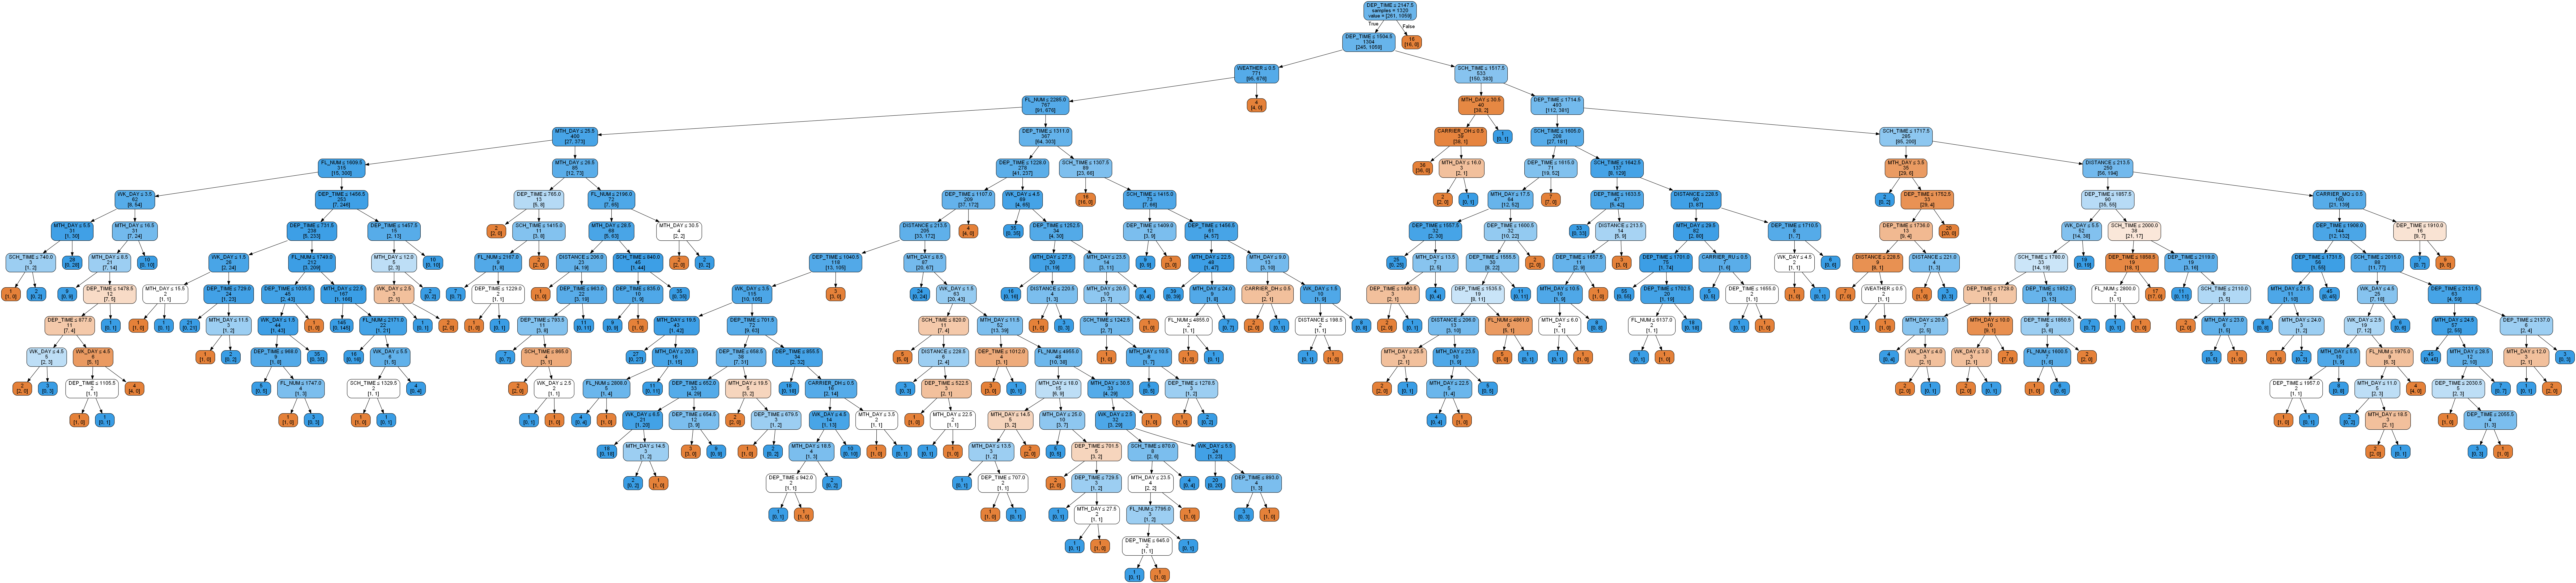

In [20]:
# Grow full classification tree using training partition.
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [21]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 395


In [22]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0  261    0
     1    0 1059

Validation Partition
Confusion Matrix (Accuracy 0.8388)

       Prediction
Actual   0   1
     0 100  67
     1  75 639


## Five-fold cross validation for flight delays full classification tree

In [23]:
# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier()

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.822', '0.818', '0.811', '0.848', '0.875']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.835 (+/- 0.048)


## Smaller Classification tree using DecisionTreeClassifier() control parameters

Small Classification Tree with Control Parameters


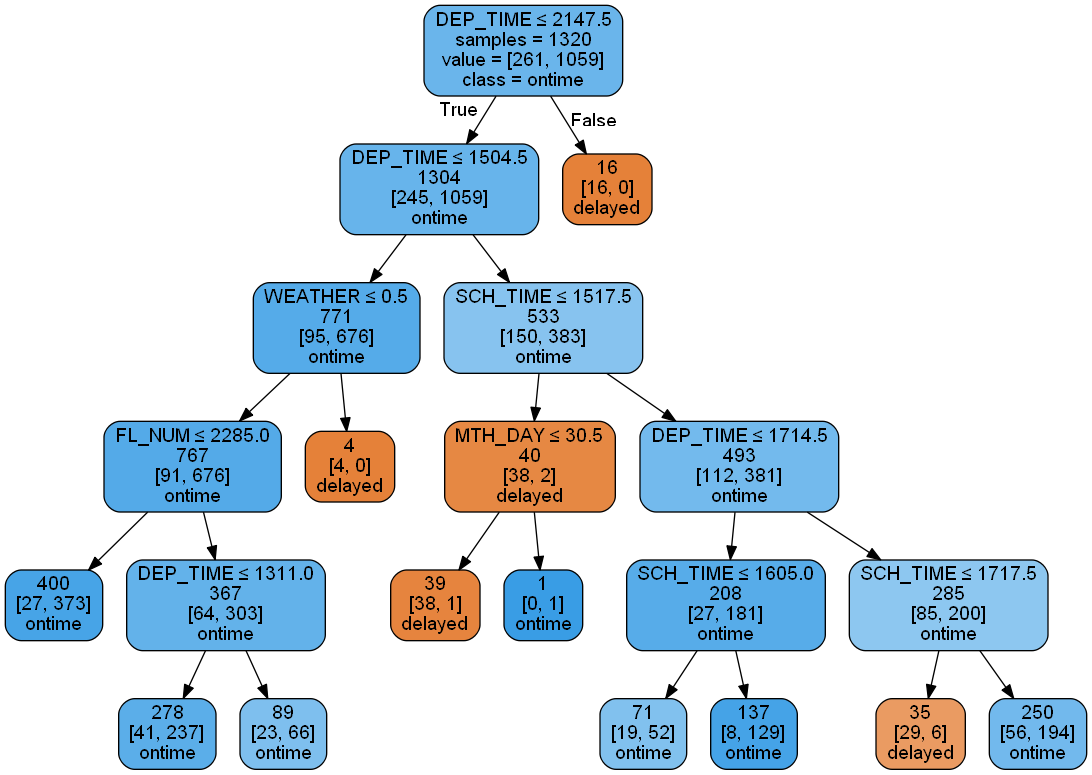

In [25]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=5, 
        min_impurity_decrease=0.001, min_samples_split=10)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns, class_names = smallClassTree.classes_)


In [27]:
print("Number of nodes: ", smallClassTree.tree_.node_count)

Number of nodes:  21


## Five fold cross validation for smaller tree with control parameters

In [28]:
# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores_small = cross_val_score(smallClassTree, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores_small])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores_small.mean():.3f} (+/- {scores_small.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.833', '0.837', '0.830', '0.856', '0.837']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.839 (+/- 0.018)


## Confusion matrices for smaller classification tree. 

In [28]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

#Training data set:
#Accuracy = 87+1052/1320 = 0.8629 = 86.29 %
#Misclassification = 1- 0.8629 = 0.1371 = 13.71 %

#Validation data set:
#Accuracy = 54+700/881 = 0.8558 = 85.58 %
#Misclassification = 1- 0.8558 = 0.1442 = 14.42 %

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8629)

       Prediction
Actual    0    1
     0   87  174
     1    7 1052

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8558)

       Prediction
Actual   0   1
     0  54 113
     1  14 700


## Make classification for new data using smaller classfication tree. 

In [30]:
# Develop dataframe with 2 new flight records. Notice that the 
# 'FL_STATUS' outcome variable is not present in these records. 
 
new_data_small = pd.DataFrame({
            'SCH_TIME' : [1230, 2050],
            'DEP_TIME' : [1240, 2105],
            'DISTANCE' : [214, 199], 
            'FL_NUM' : [808, 4976], 
            'WEATHER' : [1, 0], 
            'WK_DAY': [4, 5],
            'MTH_DAY' : [20, 30], 
            'CARRIER_DH' : [0, 0],
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],
            'CARRIER_OH' : [0, 0],
            'CARRIER_RU' : [0, 0],
            'CARRIER_UA' : [1, 0],
            'CARRIER_US' : [0, 0],
})

# Make classifications for new data. 
pred_small_tree = smallClassTree.predict(new_data_small)

# Make classifications for new Flight data.
pred_small_result = pd.DataFrame({
            'SCH_TIME' : [1230, 2050],
            'DEP_TIME' : [1240, 2105],
            'DISTANCE' : [214, 199], 
            'FL_NUM' : [808, 4976], 
            'WEATHER' : [1, 0], 
            'WK_DAY': [4, 5],
            'MTH_DAY' : [20, 30], 
            'CARRIER_DH' : [0, 0],
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],
            'CARRIER_OH' : [0, 0],
            'CARRIER_RU' : [0, 0],
            'CARRIER_UA' : [1, 0],
            'CARRIER_US' : [0, 0],
            'Classification': pred_small_tree,
})
print()
print('Classifications for new Flight data')
print(pred_small_result)
    


Classifications for new Flight data
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      1230      1240       214     808        1       4       20           0   
1      2050      2105       199    4976        0       5       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           0           0           0           1           0   
1           1           0           0           0           0           0   

  Classification  
0        delayed  
1         ontime  


## Improved Grid Search

In [50]:
# Improved grid search.

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster.
param_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 30)),
}

# Apply GridSearchCV() function for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8659
Improved parameters:  {'max_depth': 11, 'min_impurity_decrease': 0.001, 'min_samples_split': 11}


Best Classification Tree with Grid Search


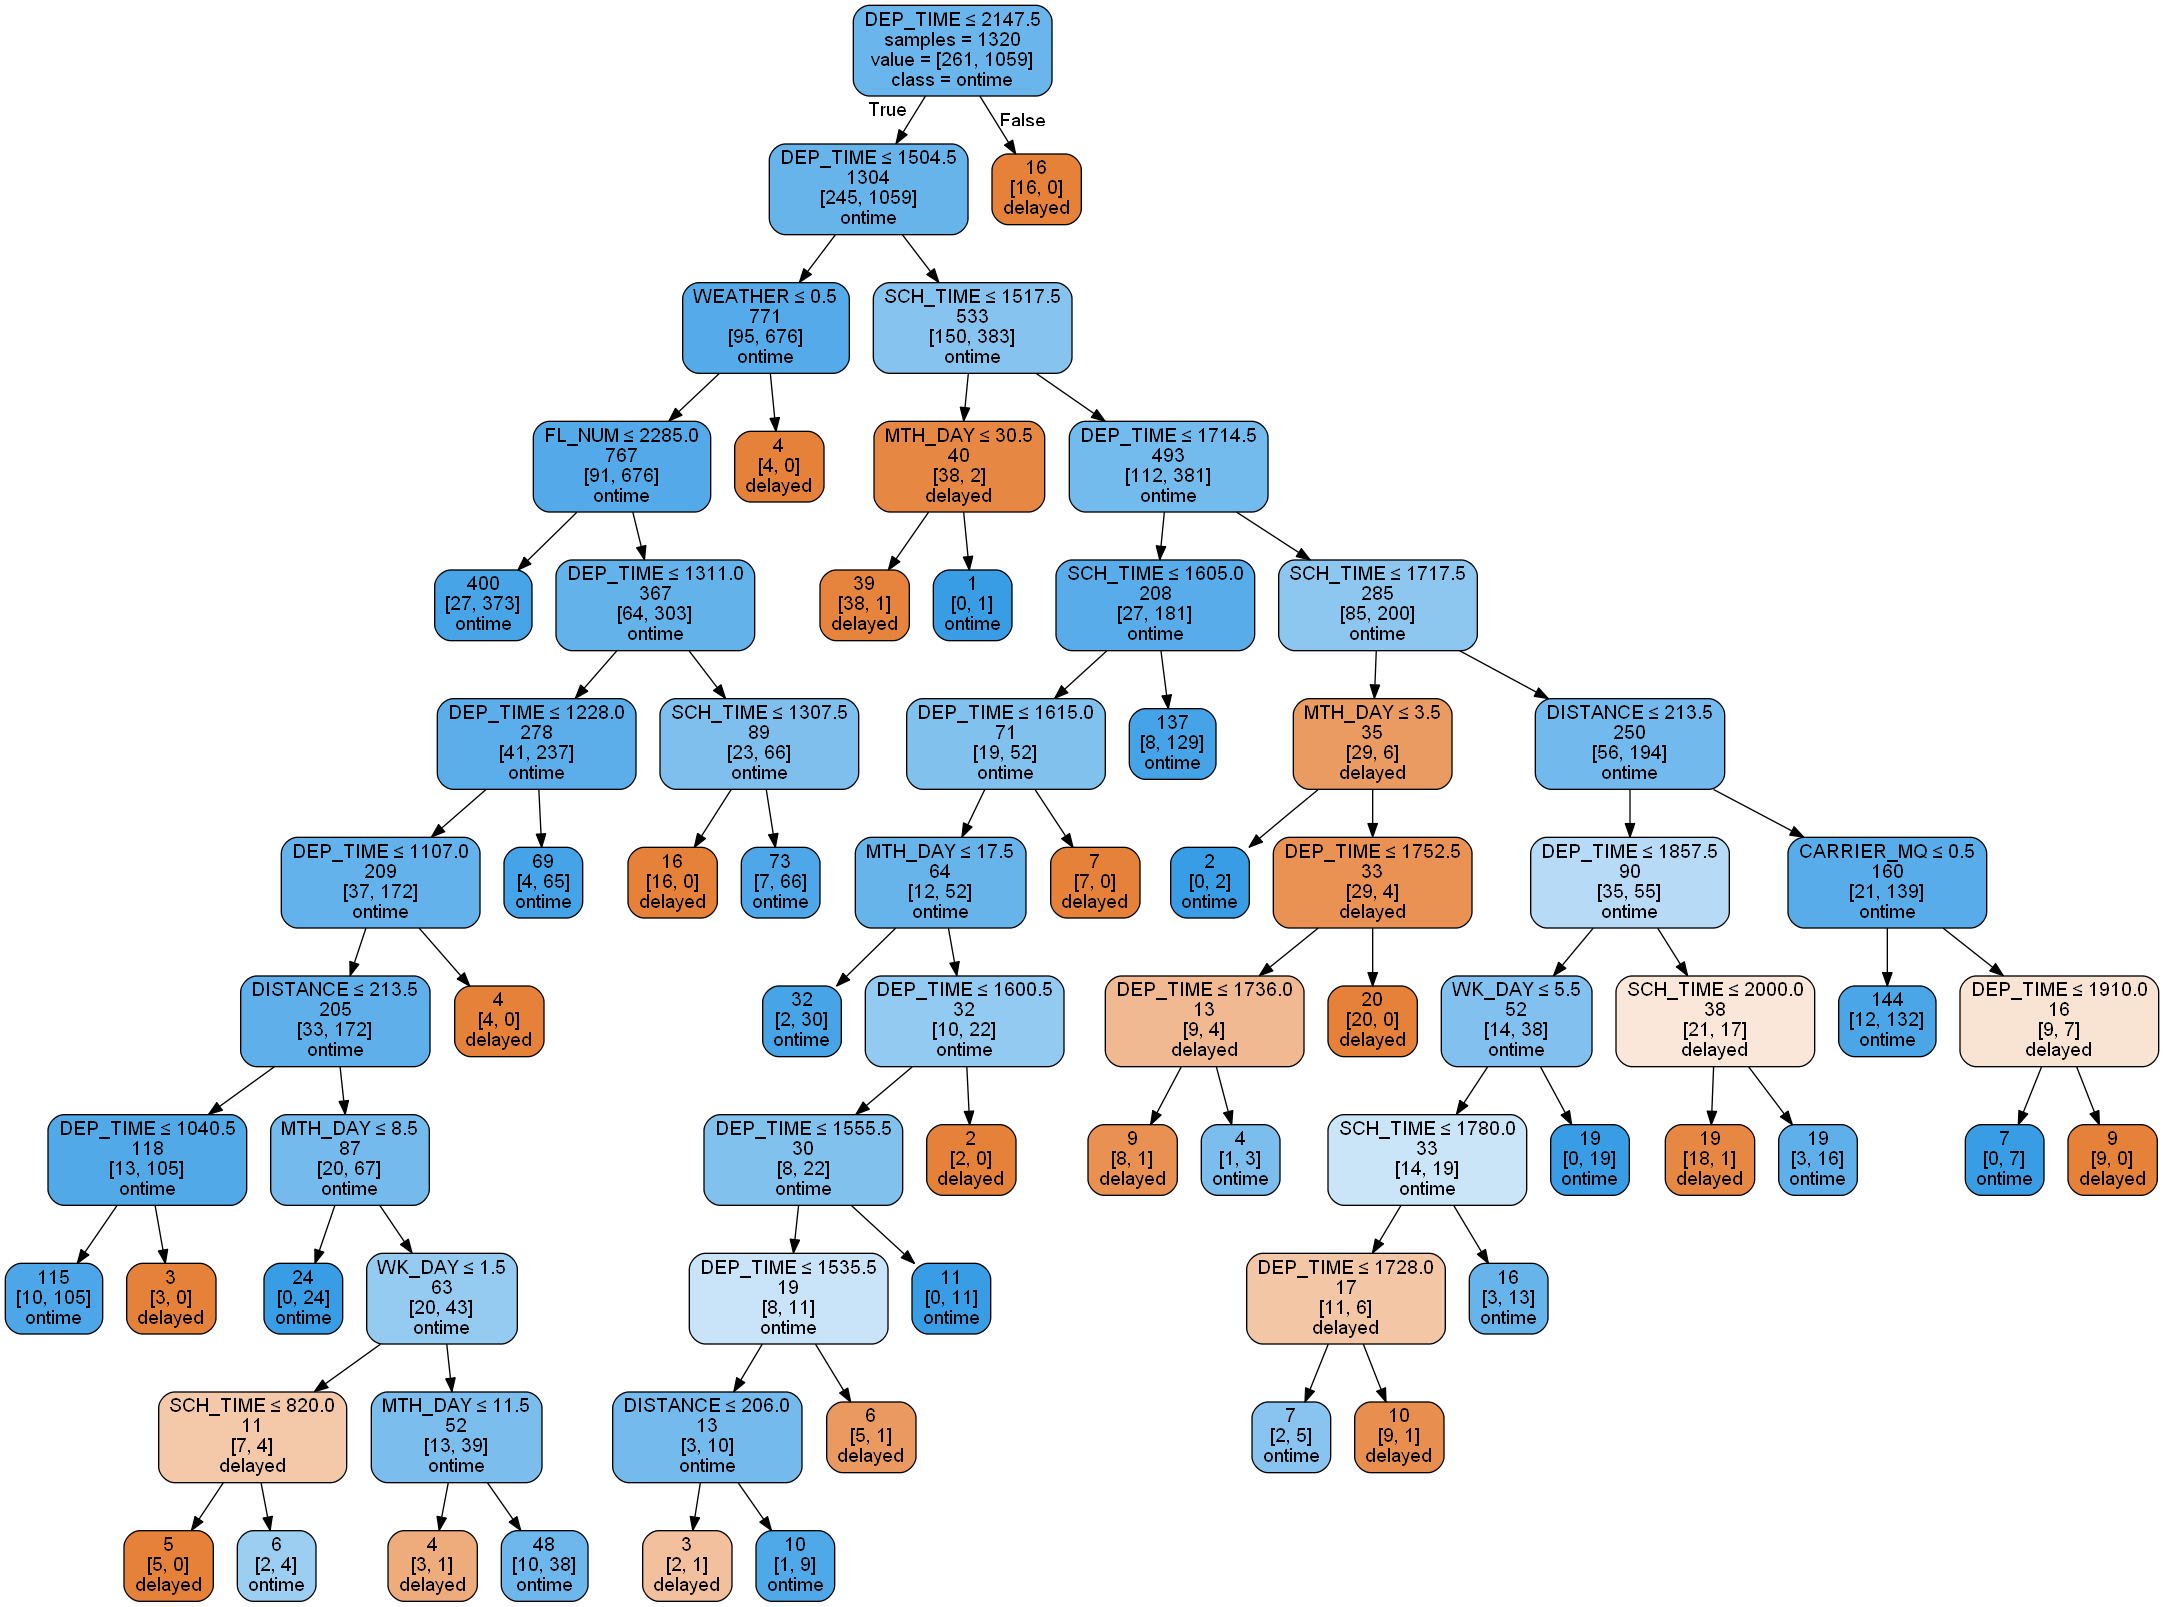

In [51]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names = bestClassTree.classes_)

In [52]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 73


##  Confusion matrices for grid search classification tree.

In [55]:
# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9250)

       Prediction
Actual    0    1
     0  169   92
     1    7 1052

Validation Partition
Confusion Matrix (Accuracy 0.8785)

       Prediction
Actual   0   1
     0  90  77
     1  30 684


## Make classification for the same new data using Grid Search classfication tree.

In [56]:
new_data_small_1 = pd.DataFrame({
            'SCH_TIME' : [1230, 2050],
            'DEP_TIME' : [1240, 2105],
            'DISTANCE' : [214, 199], 
            'FL_NUM' : [808, 4976], 
            'WEATHER' : [1, 0], 
            'WK_DAY': [4, 5],
            'MTH_DAY' : [20, 30], 
            'CARRIER_DH' : [0, 0],
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],
            'CARRIER_OH' : [0, 0],
            'CARRIER_RU' : [0, 0],
            'CARRIER_UA' : [1, 0],
            'CARRIER_US' : [0, 0],
})

# Make classifications for new data. 
pred_small_tree_1 = bestClassTree.predict(new_data_small_1)

# Make classifications for new Universal Bank data.
pred_small_result_1 = pd.DataFrame({
            'SCH_TIME' : [1230, 2050],
            'DEP_TIME' : [1240, 2105],
            'DISTANCE' : [214, 199], 
            'FL_NUM' : [808, 4976], 
            'WEATHER' : [1, 0], 
            'WK_DAY': [4, 5],
            'MTH_DAY' : [20, 30], 
            'CARRIER_DH' : [0, 0],
            'CARRIER_DL': [0, 1],
            'CARRIER_MQ': [0, 0],
            'CARRIER_OH' : [0, 0],
            'CARRIER_RU' : [0, 0],
            'CARRIER_UA' : [1, 0],
            'CARRIER_US' : [0, 0],
            'Classification': pred_small_tree_1,
})
print()
print('Classifications for new Flight data')
print(pred_small_result_1)
    


Classifications for new Flight data
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      1230      1240       214     808        1       4       20           0   
1      2050      2105       199    4976        0       5       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           0           0           0           1           0   
1           1           0           0           0           0           0   

  Classification  
0        delayed  
1         ontime  
